# Importing required libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [82]:
import sklearn

In [83]:
#Importing sklearn libraries that are required in all the training algorithms
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [84]:
covid_df = pd.read_csv("../dataset/covid.csv")
covid_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [85]:
covid_df.shape

(566602, 23)

This shows that there are 566602 rows and 23 columns

In [86]:
covid_df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


# Checking for null values i.e. NaN values

In [87]:
covid_df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

This shows that there are no null values in the dataset.

# Drop Unnecessary Columns

The columns like "entry_date", "date_died", "date_symptom", "id" etc are of no use. So we will drop these columns from the dataset.

In [88]:
covid_df.drop(columns = {'entry_date', 'date_died', 'date_symptoms', 'id', 'icu'}, axis = 1, inplace = True)
# covid_df.drop(columns = {'entry_date', 'date_died', 'date_symptoms', 'id', 'icu', 'age'}, axis = 1, inplace = True)
covid_df.shape

(566602, 18)

This shows that now we have only 18 columns and 566602 rows.

In [89]:
covid_df['covid_res'].value_counts().to_frame()

,covid_res
2,279035
1,220657
3,66910


This shows that:

1. positive
2. negative
3. awaiting

So, now we will replace (1, 2, 3) with (1, 0, 2) using replace method present in pandas

In [90]:
covid_df['covid_res'].replace([1,2,3], [1,0,2], inplace = True)
covid_df['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657
2,66910


Now we will try to understand covid_res column which shows the result of covid test.

Text(0.5, 1.0, 'Covid Result')

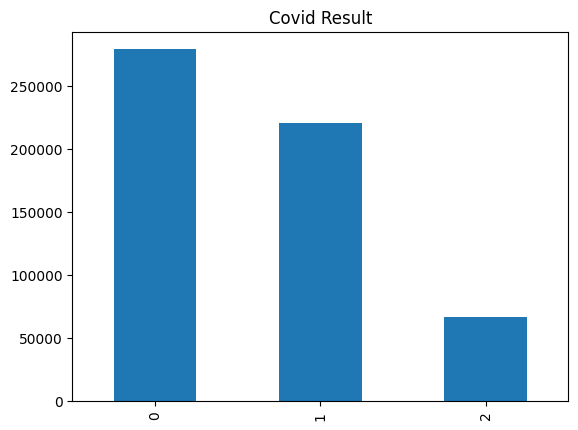

In [91]:
covid_df['covid_res'].value_counts().sort_index().plot.bar()
plt.title('Covid Result')

Since we are focusing on predicting whether is person is infected with covid or not so we will drop the 'covid_res' = awaiting rows from the dataset because we need to classify the dataset in positive and negative only.

In [92]:
covid_df = covid_df[covid_df['covid_res'] != 2]
covid_df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1


In [93]:
covid_df['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657


This shows that we have successfull dropped the rows with covid_res = awaiting.

# Checking presence of inappropriate data in different columns

In [94]:
columns = covid_df.columns
for i in range(18):
# for i in range(17):
    print(covid_df[columns[i]].value_counts().to_frame())
    print("############################################")

      sex
2  253098
1  246594
############################################
   patient_type
1        392146
2        107546
############################################
    intubed
97   392146
2     98321
1      9103
99      122
############################################
    pneumonia
2      420965
1       78716
99         11
############################################
       age
30   12872
31   12298
36   12292
38   12259
37   12248
..     ...
117      1
115      1
105      1
107      1
111      1

[120 rows x 1 columns]
############################################
    pregnancy
97     253098
2      241644
1        3614
98       1336
############################################
    diabetes
2     435702
1      62349
98      1641
############################################
      copd
2   489970
1     8276
98    1446
############################################
    asthma
2   482036
1    16214
98    1442
############################################
    inmsupr
2    489959
1      8071

This shows that columns like 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension' etc, contains lot of garbage values which will decrease the accuracy of our model.

To prevent that we will perform data processing.

# Intubed

In [95]:
covid_df['intubed'].value_counts().to_frame()

,intubed
97,392146
2,98321
1,9103
99,122


In [96]:
covid_df = covid_df[covid_df['intubed'] != 97]
covid_df = covid_df[covid_df['intubed'] != 99]
covid_df['intubed'].value_counts().to_frame()

,intubed
2,98321
1,9103


# Pneumonia

In [97]:
covid_df['pneumonia'].value_counts().to_frame()

,pneumonia
1,66080
2,41344


# Pregnancy

In [98]:
covid_df['pregnancy'].value_counts().to_frame()

,pregnancy
97,64498
2,41821
1,969
98,136


In [99]:
covid_df = covid_df[covid_df['pregnancy'] != 97]
covid_df = covid_df[covid_df['pregnancy'] != 98]
covid_df['pregnancy'].value_counts().to_frame()

,pregnancy
2,41821
1,969


# Diabetes

In [100]:
covid_df['diabetes'].value_counts().to_frame()

,diabetes
2,29094
1,13502
98,194


In [101]:
covid_df = covid_df[covid_df['diabetes'] != 98]
covid_df['diabetes'].value_counts().to_frame()

,diabetes
2,29094
1,13502


# Copd

In [102]:
covid_df['copd'].value_counts().to_frame()

,copd
2,40307
1,2267
98,22


In [103]:
covid_df = covid_df[covid_df['copd'] != 98]
covid_df['copd'].value_counts().to_frame()

,copd
2,40307
1,2267


# Asthma

In [104]:
covid_df['asthma'].value_counts().to_frame()

,asthma
2,40988
1,1578
98,8


In [105]:
covid_df = covid_df[covid_df['asthma'] != 98]
covid_df['asthma'].value_counts().to_frame()

,asthma
2,40988
1,1578


# Inmsupr

In [106]:
covid_df['inmsupr'].value_counts().to_frame()

,inmsupr
2,40541
1,1983
98,42


In [107]:
covid_df = covid_df[covid_df['inmsupr'] != 98]
covid_df['inmsupr'].value_counts().to_frame()

,inmsupr
2,40541
1,1983


# Hypertension

In [108]:
covid_df['hypertension'].value_counts().to_frame()

,hypertension
2,26800
1,15713
98,11


In [109]:
covid_df = covid_df[covid_df['hypertension'] != 98]
covid_df['hypertension'].value_counts().to_frame()

,hypertension
2,26800
1,15713


# Other Diseases

In [110]:
covid_df['other_disease'].value_counts().to_frame()

,other_disease
2,39342
1,3044
98,127


In [111]:
covid_df = covid_df[covid_df['other_disease'] != 98]
covid_df['other_disease'].value_counts().to_frame()

,other_disease
2,39342
1,3044


# Cardiovascular

In [112]:
covid_df['cardiovascular'].value_counts().to_frame()

,cardiovascular
2,39973
1,2402
98,11


In [113]:
covid_df = covid_df[covid_df['cardiovascular'] != 98]
covid_df['cardiovascular'].value_counts().to_frame()

,cardiovascular
2,39973
1,2402


# Obesity

In [114]:
covid_df['obesity'].value_counts().to_frame()

,obesity
2,32311
1,10013
98,51


In [115]:
covid_df = covid_df[covid_df['obesity'] != 98]
covid_df['obesity'].value_counts().to_frame()

,obesity
2,32311
1,10013


# Renal Chronic

In [116]:
covid_df['renal_chronic'].value_counts().to_frame()

,renal_chronic
2,39607
1,2706
98,11


In [117]:
covid_df = covid_df[covid_df['renal_chronic'] != 98]
covid_df['renal_chronic'].value_counts().to_frame()

,renal_chronic
2,39607
1,2706


# Tobacco

In [118]:
covid_df['tobacco'].value_counts().to_frame()

,tobacco
2,40303
1,1988
98,22


In [119]:
covid_df = covid_df[covid_df['tobacco'] != 98]
covid_df['tobacco'].value_counts().to_frame()

,tobacco
2,40303
1,1988


# Contact Other Covid

In [120]:
covid_df['contact_other_covid'].value_counts().to_frame()

,contact_other_covid
99,21939
2,14174
1,6178


As we can most of the values are 99 so we should take them under consideration.


Now we will replace 99 with 0.

In [121]:
covid_df['contact_other_covid'].replace(99, 0, inplace = True)
covid_df['contact_other_covid'].value_counts().to_frame()

,contact_other_covid
0,21939
2,14174
1,6178


As we have removed unwanted rows, now we'll reset index.

In [122]:
covid_df.reset_index(drop=True,inplace=True)
covid_df.head(10)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,0,1
1,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,0,1
2,1,2,1,1,39,2,2,2,2,2,2,2,2,1,2,2,0,1
3,1,2,2,1,46,2,2,2,2,2,2,2,2,2,2,2,0,1
4,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1
5,1,2,2,2,52,2,2,2,2,2,2,2,2,1,2,1,1,1
6,1,2,2,2,83,2,1,1,2,1,1,2,1,2,2,2,0,1
7,1,2,2,1,53,2,1,2,2,2,2,2,2,1,2,2,0,1
8,1,2,2,2,41,2,1,2,2,2,2,2,2,2,2,1,0,1
9,1,2,2,1,48,2,2,2,1,2,1,2,2,2,2,2,0,1


# Data Visualization

Text(0.5, 1.0, 'Correlation heatmap')

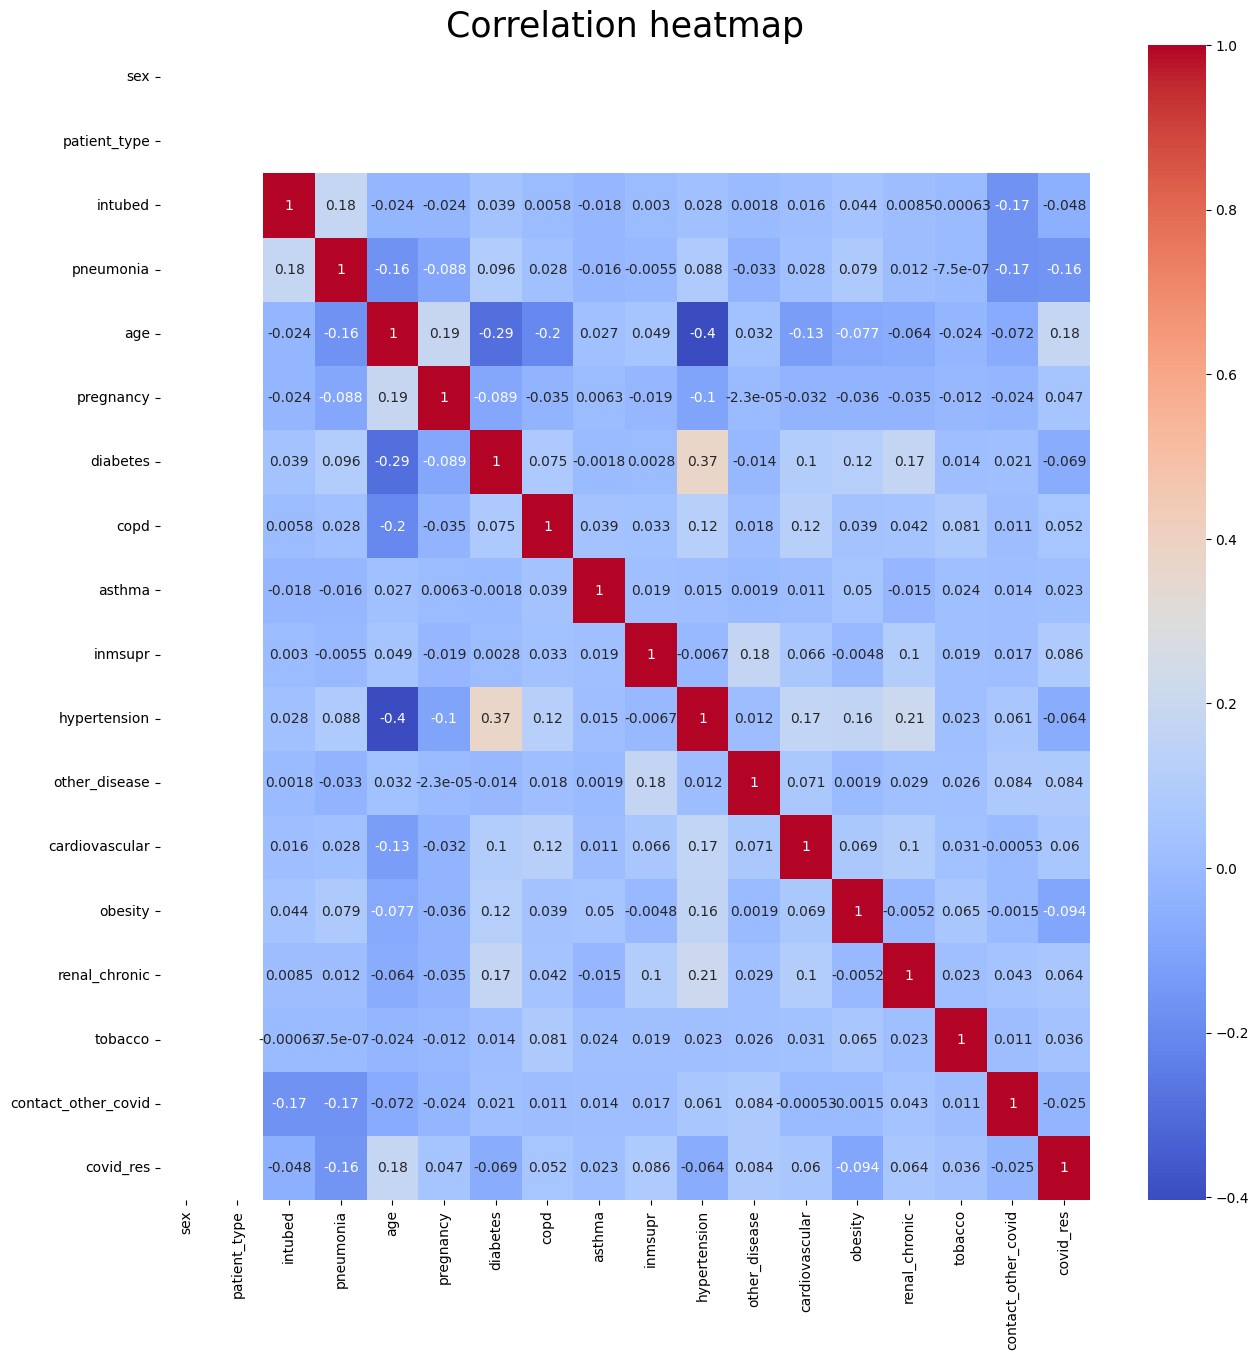

In [123]:
plt.figure(figsize = (15, 15))
sns.heatmap(covid_df.corr(), cmap = 'coolwarm', annot=True)
plt.title('Correlation heatmap', size=25)

In [124]:
features=['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid']
# features=['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy',
#        'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
#        'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
#        'tobacco', 'contact_other_covid']
list(enumerate(features))

[(0, 'sex'),
 (1, 'patient_type'),
 (2, 'intubed'),
 (3, 'pneumonia'),
 (4, 'age'),
 (5, 'pregnancy'),
 (6, 'diabetes'),
 (7, 'copd'),
 (8, 'asthma'),
 (9, 'inmsupr'),
 (10, 'hypertension'),
 (11, 'other_disease'),
 (12, 'cardiovascular'),
 (13, 'obesity'),
 (14, 'renal_chronic'),
 (15, 'tobacco'),
 (16, 'contact_other_covid')]

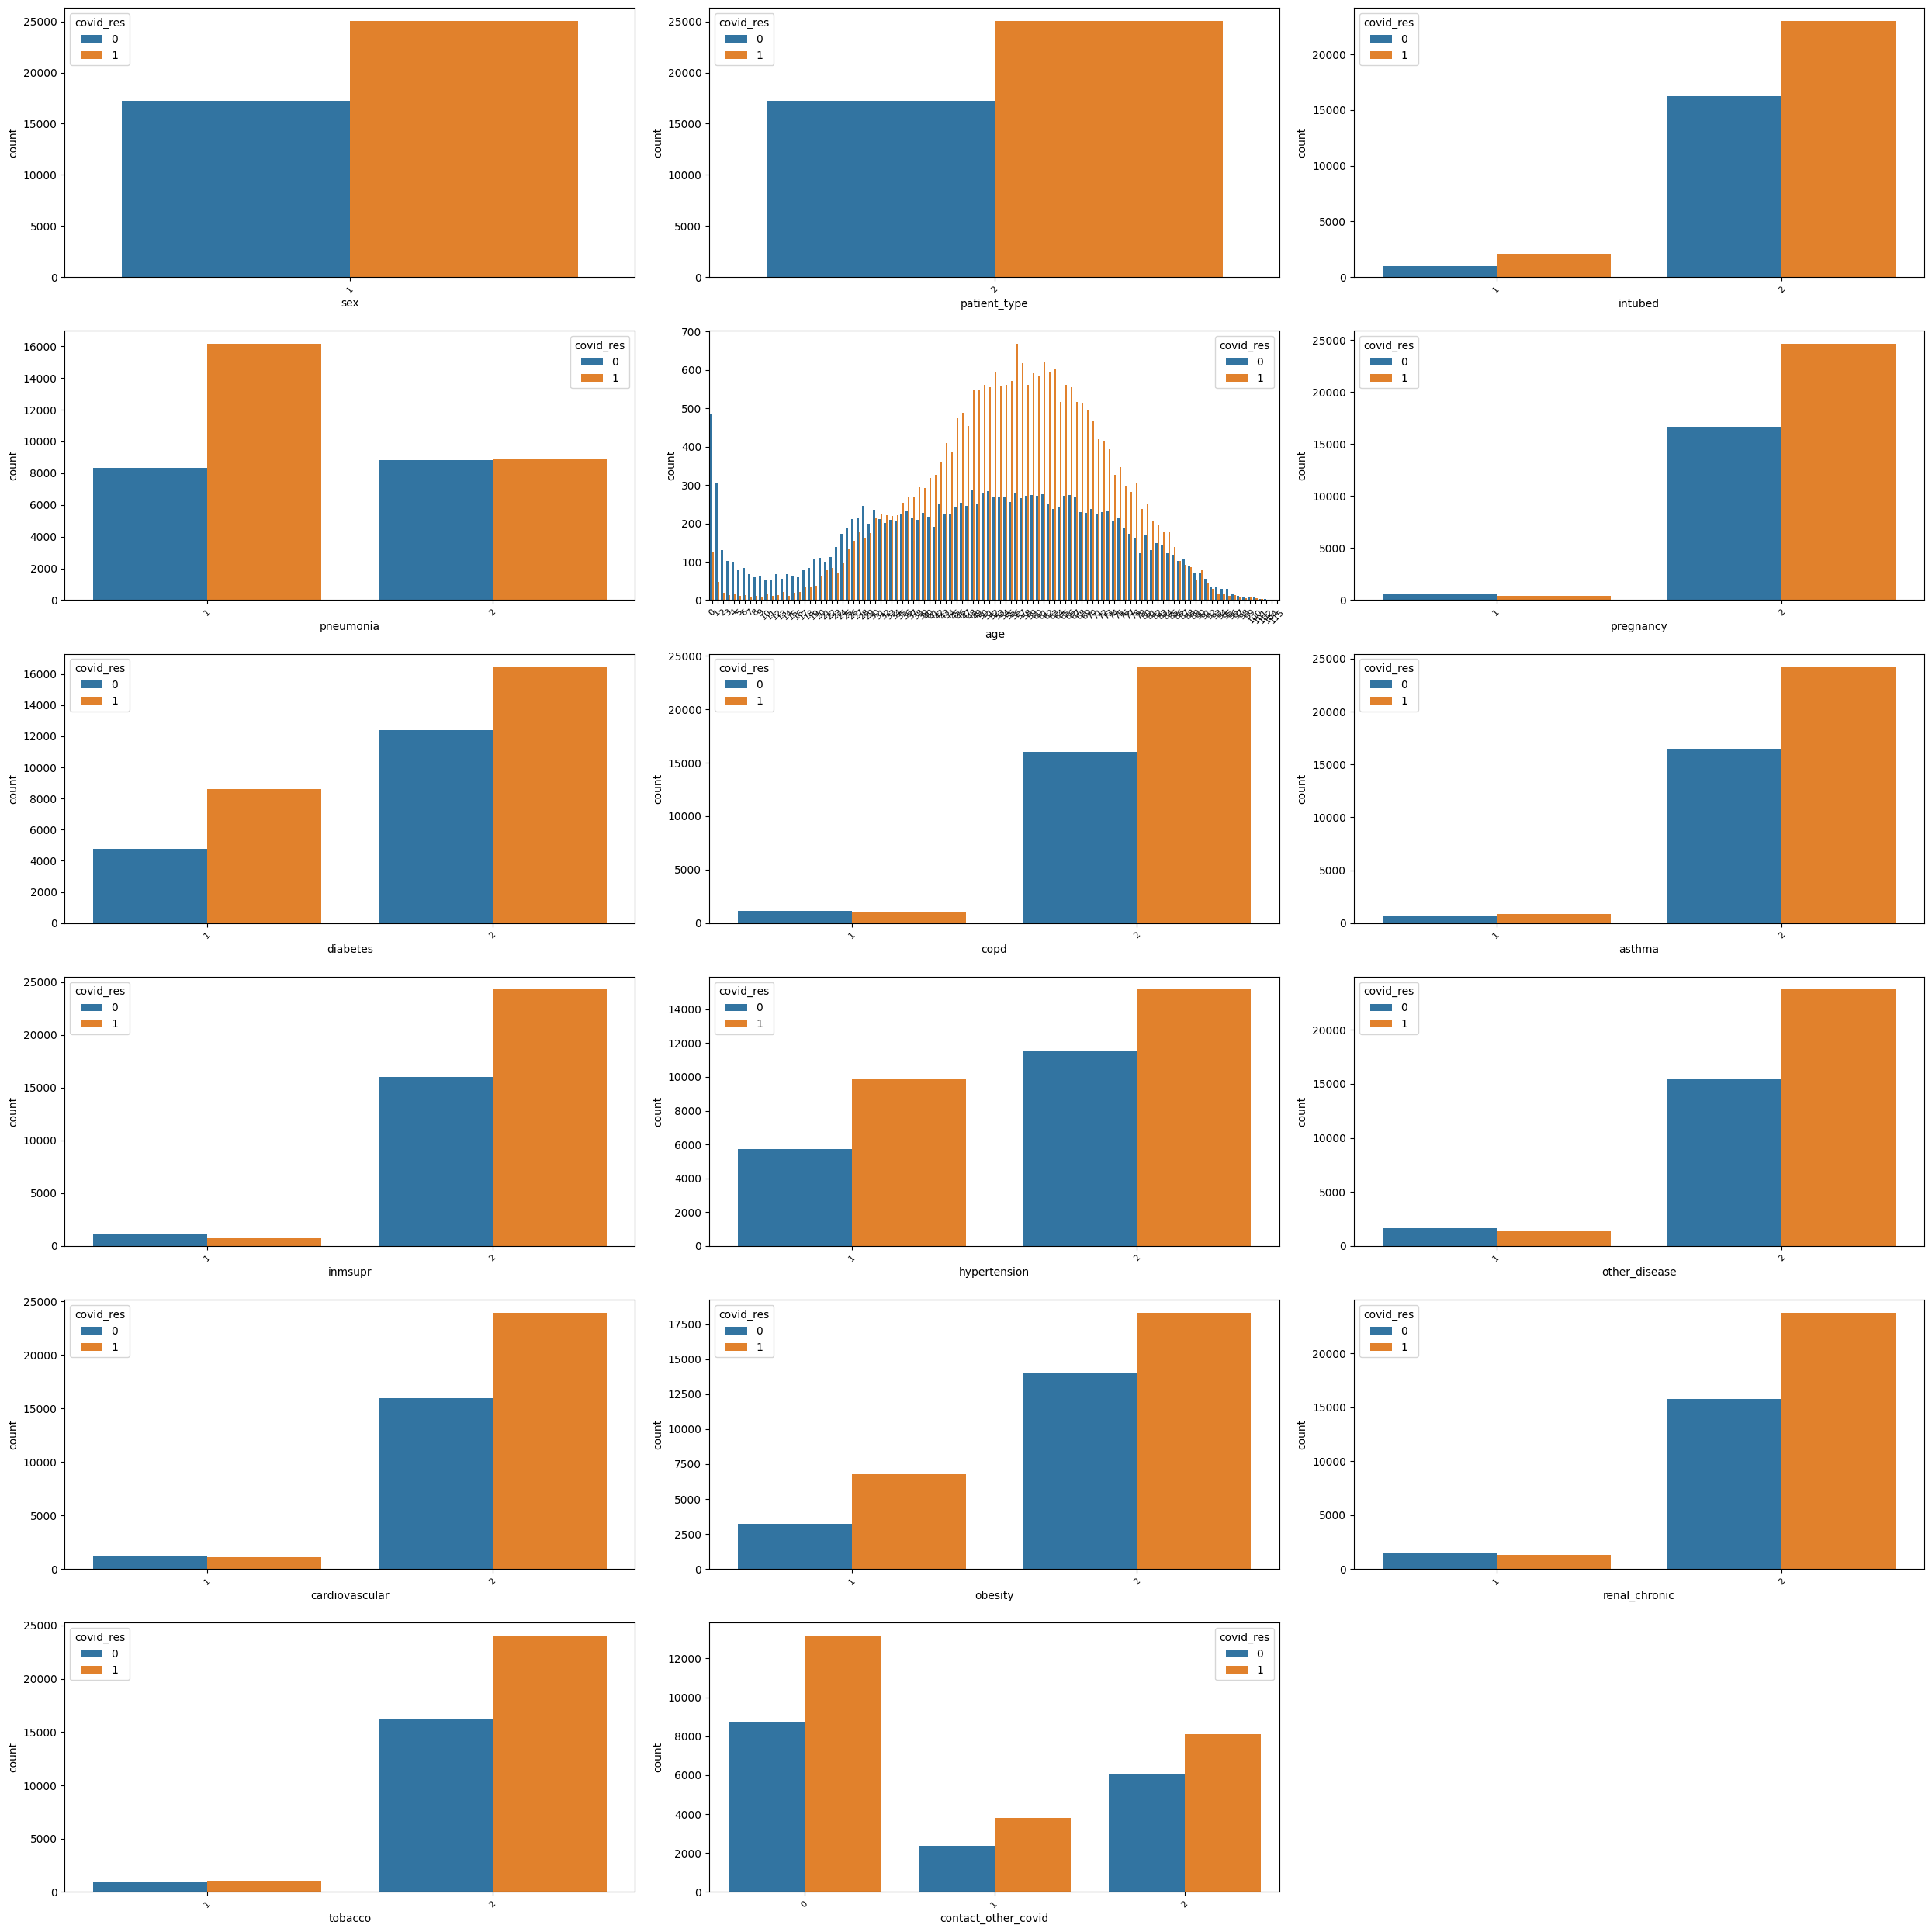

In [125]:
plt.figure(figsize = (25, 25))
for i in enumerate(features):
    plt.subplot(6, 3, i[0] + 1)
    sns.countplot(data = covid_df, x = i[1], hue = 'covid_res')
    plt.xticks(rotation = 45, size = 8)
    plt.tight_layout()  

In [126]:
covid_df.to_csv("modified_covid_dataset.csv")

# Applying Standard Scaler

Due to age column we need to apply Standard scaler.

In [130]:
#Importing library required for applying StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(covid_df.drop('covid_res', axis = 1))

ValueError: could not convert string to float: '16169f'

In [128]:
scaled_features = scaler.transform(covid_df.drop('covid_res', axis = 1))
covid_df_featured = pd.DataFrame(scaled_features, columns = covid_df.columns[:-1])
covid_df_featured.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid
0,0.0,0.0,0.276767,1.175095,0.071358,0.152567,0.680591,0.236827,0.195899,0.220979,0.765825,0.278052,0.245283,-1.797676,0.261353,0.222095,-0.901441
1,0.0,0.0,0.276767,1.175095,0.369083,0.152567,-1.469311,0.236827,0.195899,0.220979,-1.305782,0.278052,-4.076917,0.556274,0.261353,0.222095,-0.901441
2,0.0,0.0,-3.613148,-0.850995,-0.672956,0.152567,0.680591,0.236827,0.195899,0.220979,0.765825,0.278052,0.245283,-1.797676,0.261353,0.222095,-0.901441
3,0.0,0.0,0.276767,-0.850995,-0.325610,0.152567,0.680591,0.236827,0.195899,0.220979,0.765825,0.278052,0.245283,0.556274,0.261353,0.222095,-0.901441
4,0.0,0.0,0.276767,1.175095,-1.367649,0.152567,0.680591,0.236827,0.195899,0.220979,0.765825,0.278052,0.245283,0.556274,0.261353,0.222095,0.202737


In [48]:
# covid_df_featured = covid_df.drop('covid_res', axis = 1)
# covid_df_featured.head()

# Splitting the data into train and test

In [49]:
covid_df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,0,1
1,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,0,1
2,1,2,1,1,39,2,2,2,2,2,2,2,2,1,2,2,0,1
3,1,2,2,1,46,2,2,2,2,2,2,2,2,2,2,2,0,1
4,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2,1,1


In [50]:
covid_df.shape

(42291, 18)

In [51]:
X = covid_df_featured.iloc[:, :].values
y = covid_df.iloc[:, -1].values

In [52]:
# Importing library required for train_test_split
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(X_train.shape,
                                      y_train.shape,
                                      X_test.shape,
                                      y_test.shape
                                      ))

Size of X_train is:(33832, 17)
Size of Y_train is:(33832,)
Size of X_test is:(8459, 17)
Size of Y_test is:(8459,)



# Training the model using different algorithms

In [54]:
# accuracy_rate = []

# 1. KNN

In [55]:
#Importing required libraries for KNeighborsClassifier
# from sklearn.neighbors import KNeighborsClassifier

In [56]:
# We will be using for loop for optimum value of K
# score = []

# for i in range(1, 15):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     acc = cross_val_score(knn, X, covid_df['covid_res'], cv = 5)
#     score.append(acc.mean())

In [57]:
# error_rate = []

# for i in range(1, 15):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     acc = cross_val_score(knn, X, covid_df['covid_res'], cv = 5)
#     error_rate.append(1 - acc.mean())

In [58]:
# plt.figure(figsize = (10, 6))
# plt.plot(range(1, 15), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel("K")
# plt.ylabel('Error Rate')

In [59]:
# error_rate = []

# for i in range(1,25):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     error_rate.append(np.mean(y_pred != y_test))

In [60]:
# plt.figure(figsize = (10, 6))
# plt.plot(range(1, 25), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel("K")
# plt.ylabel('Error Rate')

In [61]:
# plt.figure(figsize = (10, 6))
# plt.plot(range(1, 15), score, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel("K")
# plt.ylabel('Error Rate')

In [62]:
# knn = KNeighborsClassifier(n_neighbors = 4)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# KNN_score = metrics.accuracy_score(y_test, y_pred)
# print("Train set Accuracy at {} is {}  ".format(4,metrics.accuracy_score(y_train, knn.predict(X_train))))
# print("Test set Accuracy at {} is {}".format(4,KNN_score))

# Train set Accuracy at 4 is 0.6931307637739418  
# Test set Accuracy at 4 is 0.5850573353824329

In [63]:
# accuracy_rate.append(0.585)

# 2. Logistic Regression 

In [64]:
# from sklearn.linear_model import LogisticRegression
# LR=LogisticRegression(C=0.03, solver='liblinear')
# LR.fit(X_train,y_train)
# y_pred = LR.predict(X_test)
# y_pred_prob = LR.predict_proba(X_test)
# logReg_score=metrics.accuracy_score(y_test, y_pred)
# print("LogisticRegression's Accuracy:{0}".format(metrics.accuracy_score(y_test, y_pred)))

In [65]:
# accuracy_rate.append(0.662)

# 3. Decision Tree

In [66]:
# from sklearn.tree import DecisionTreeClassifier
# for i in range(1,25):
#     drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
#     drugTree.fit(X_train,y_train)
#     predTree = drugTree.predict(X_test)
#     decisionTree_score=metrics.accuracy_score(y_test, predTree)
#     print("DecisionTrees's Accuracy at {} is {}\n".format(i,metrics.accuracy_score(y_test, predTree)))

In [67]:
# Got highest accuracy at i=9;
# accuracy_rate.append(0.661)

# 4. SVM

In [68]:
# from sklearn import svm
# clf = svm.SVC(kernel='rbf')
# clf.fit(X_train, y_train) 
# y_pred = clf.predict(X_test)
# svm_score=metrics.accuracy_score(y_test, y_pred)
# print("SVM's Accuracy:{0}".format(metrics.accuracy_score(y_test, y_pred)))

In [69]:
# accuracy_rate.append(svm_score)

# 5. Random Forest Classifier

In [70]:
# from sklearn.ensemble import RandomForestClassifier
# Random_forest = RandomForestClassifier(n_estimators=50)
# Random_forest.fit(X_train,y_train)
# randomForest_predict = Random_forest.predict(X_test)
# randomForest_score = metrics.accuracy_score(y_test, randomForest_predict)
# print("Random Forest Score :",randomForest_score)

In [71]:
# accuracy_rate.append(randomForest_score)

# 6. Gradient Boosting

In [72]:
# from sklearn.ensemble import GradientBoostingClassifier

# gbk = GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)
# gbk.fit(X_train, y_train)
# gbk_predict = gbk.predict(X_test)
# gbk_score = gbk.score(X_test,y_test)
# print("Gradient Boosting Prediction :",gbk_predict)
# print("Gradient Boosting Score :",gbk_score)

In [73]:
# accuracy_rate.append(gbk_score)

In [74]:
# algo_name=['KNN','Logistic Regression','Decision Tree','SVM','Random Forest','Gradient Boosting']
# accuracy_rate=np.array(accuracy_rate)

# Conclusion

In [75]:
# from numpy import median
# plt.figure(figsize=(10,8))
# sns.barplot(y=accuracy_rate*100,x=algo_name,estimator=median,palette="Blues_d")
# plt.xlabel('Algorithm Name',size=30)
# plt.xticks(rotation=45)
# plt.ylabel('Accuracy',size=30)

From different algo used, it is pretty clear that nearly 66% prediction is accurate for being known whether you are in danger or not from being affected by covid-19.

In [76]:
print(X_test)

[[ 0.          0.          0.27676699 ...  0.26135273  0.22209537
   0.2027367 ]
 [ 0.          0.          0.27676699 ...  0.26135273  0.22209537
  -0.90144074]
 [ 0.          0.          0.27676699 ...  0.26135273  0.22209537
  -0.90144074]
 ...
 [ 0.          0.          0.27676699 ...  0.26135273  0.22209537
   0.2027367 ]
 [ 0.          0.          0.27676699 ... -3.82624656  0.22209537
  -0.90144074]
 [ 0.          0.          0.27676699 ...  0.26135273  0.22209537
  -0.90144074]]


In [129]:
from sklearn.preprocessing import StandardScaler
covid_df = pd.read_csv("../dataset/covid.csv")
scaler = StandardScaler()
scaler.fit(covid_df.drop('covid_res', axis = 1))
scaled_feature = scaler.transform([[1, 2, 1, 1, 34, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2]])
# covid_df_featured = pd.DataFrame(scaled_features, columns = covid_df.columns[:-1])
scaled_feature

ValueError: could not convert string to float: '16169f'

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)
gbk_model = gbk.fit(X_train, y_train)

import pickle
pickle.dump(gbk_model, open('covid_prediction.pkl', 'wb'))
# gbk_predict = gbk.predict(scaled_feature)
# # gbk_score = gbk.score(X_test,y_test)
# print("Gradient Boosting Prediction :",gbk_predict)
# # print("Gradient Boosting Score :",gbk_score)

In [79]:
# import pickle